In [94]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import face_recognition
import keras
from keras.models import load_model
import cv2
import os
from EmoPy.src.fermodel import FERModel
from pkg_resources import resource_filename

In [95]:
# constants
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

In [166]:
# source picture (this will be sent from a remote camera, for now we use a test picture)

source_picture = '../Test_pictures/old6.png'

In [167]:
# load the image file and detect the faces inside it
image = face_recognition.load_image_file(source_picture)

face_locations = face_recognition.face_locations(image)

In [168]:
face_locations

[(119, 461, 504, 76)]

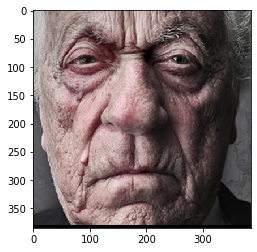

In [169]:
# save the detected faces in a folder

for index, face in enumerate(face_locations):
    top, right, bottom, left = face
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    image_save = Image.fromarray(face_image)
    image_save.save(f"/home/andrea/EmoPy/EmoPy/tmp_img_to_process/to_process{index}.jpg")

In [170]:
# read the saved faces, predict emotion, and identify age and gender
# we are now printing this informations on screen, this info will be later be sent to a customer database
# in order to register the necessary info

files_to_process = os.listdir("/home/andrea/EmoPy/EmoPy/tmp_img_to_process")

# load model for emotion recognition
target_emotions = ['calm', 'happiness', 'anger']
model = FERModel(target_emotions, verbose=True)

# load model for gender recognition
genderProto = "gender_deploy.prototxt"
genderModel = "gender_net.caffemodel"
genderNet = cv2.dnn.readNet(genderModel, genderProto)
genderList = ['Male', 'Female']

# load model for age recognition
ageProto = "age_deploy.prototxt"
ageModel = "age_net.caffemodel"
ageNet = cv2.dnn.readNet(ageModel, ageProto)

ageList = ['(0 - 2)', '(4 - 6)', '(8 - 12)', '(15 - 20)', '(25 - 32)', '(38 - 43)', '(48 - 53)', '(60 - 100)']

Initializing FER model parameters for target emotions: ['calm', 'happiness', 'anger']


In [171]:
files_to_process

['to_process0.jpg']

In [172]:
# iterate trough the recognized faces and do the prediction
for file in files_to_process:
    print("+++++++++")
    print(f'Predicting for image {file}')
    # predict emotion
    model.predict(resource_filename("EmoPy", f'tmp_img_to_process/{file}'))
    # identify gender
    face = cv2.imread(f'/home/andrea/EmoPy/EmoPy/tmp_img_to_process/{file}')
    blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
    genderNet.setInput(blob)
    genderPreds = genderNet.forward()
    gender = genderList[genderPreds[0].argmax()]
    print("Gender : {}".format(gender))
    # identify age
    ageNet.setInput(blob)
    agePreds = ageNet.forward()
    age = ageList[agePreds[0].argmax()]
    print(agePreds)
    print("Age : {}".format(age))
    print("+++++++++")

+++++++++
Predicting for image to_process0.jpg
anger: 45.9%
calm: 17.3%
happiness: 36.7%
Gender : Male
[[1.7331186e-05 2.1357939e-05 4.2996257e-05 3.9231297e-04 8.4364181e-03
  1.6312726e-01 8.0637062e-01 2.1591701e-02]]
Age : (48 - 53)
+++++++++
